In [1]:
import pandas as pd
df = pd.read_csv('c:/data/ozone/ozone2.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Unnamed: 6,Unnamed: 7
0,41.00000,190.000000,7.4,67,5,1,NaN,NaN
1,36.00000,118.000000,8.0,72,5,2,NaN,NaN
2,12.00000,149.000000,12.6,74,5,3,NaN,NaN
3,18.00000,313.000000,11.5,62,5,4,NaN,NaN
4,42.12931,185.931507,14.3,56,5,5,NaN,NaN


In [2]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df['Ozone']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_shape=(len(X_train.columns),), activation='relu', name='input'))
model.add(Dense(4, activation='relu', name='hidden-1'))
model.add(Dense(2, activation='relu', name='hidden-2'))
model.add(Dense(1, name='output')) #항등함수
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
#loss: 손실, optimizer: 최적화함수, metrics: 성능평가기준
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 8)                 32        
                                                                 
 hidden-1 (Dense)            (None, 4)                 36        
                                                                 
 hidden-2 (Dense)            (None, 2)                 10        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


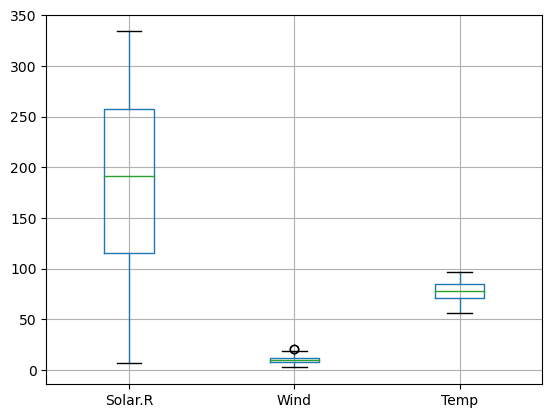

In [5]:
X_train.boxplot()
from sklearn.preprocessing import StandardScaler #평균: 0, 표준편차: 1
scaler = StandardScaler()
scaler.fit(X_train) #학습용 데이터의 패턴분석
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

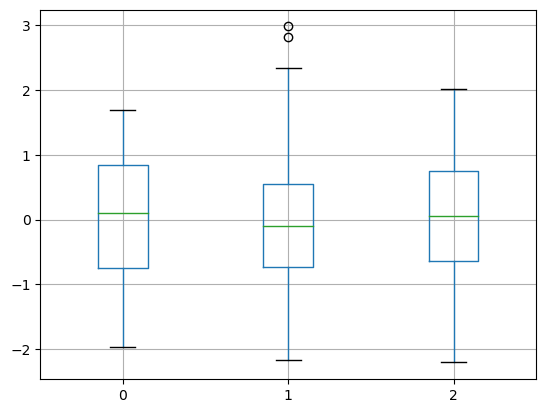

In [6]:
import matplotlib.pyplot as plt
X_train_scaled.boxplot()
plt.show()

In [14]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist = model.fit(X_train_scaled, y_train, epochs=500, batch_size=64, 
    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
2/2 [==============================] - 1s 142ms/step - loss: 2753.6694 - mse: 2753.6694 - mae: 42.4058 - val_loss: 2034.8528 - val_mse: 2034.8528 - val_mae: 38.5804
Epoch 2/500
2/2 [==============================] - 0s 25ms/step - loss: 2751.8347 - mse: 2751.8347 - mae: 42.3851 - val_loss: 2033.3070 - val_mse: 2033.3070 - val_mae: 38.5611
Epoch 3/500
2/2 [==============================] - 0s 28ms/step - loss: 2750.1287 - mse: 2750.1287 - mae: 42.3648 - val_loss: 2031.7788 - val_mse: 2031.7788 - val_mae: 38.5419
Epoch 4/500
2/2 [==============================] - 0s 26ms/step - loss: 2748.4036 - mse: 2748.4036 - mae: 42.3448 - val_loss: 2030.2745 - val_mse: 2030.2745 - val_mae: 38.5230
Epoch 5/500
2/2 [==============================] - 0s 26ms/step - loss: 2746.6655 - mse: 2746.6655 - mae: 42.3251 - val_loss: 2028.7928 - val_mse: 2028.7928 - val_mae: 38.5042
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 2745.0476 - mse: 2745.0476 - mae: 42.3052 - val

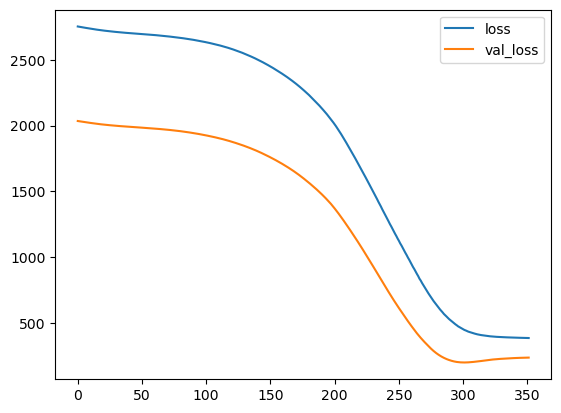

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

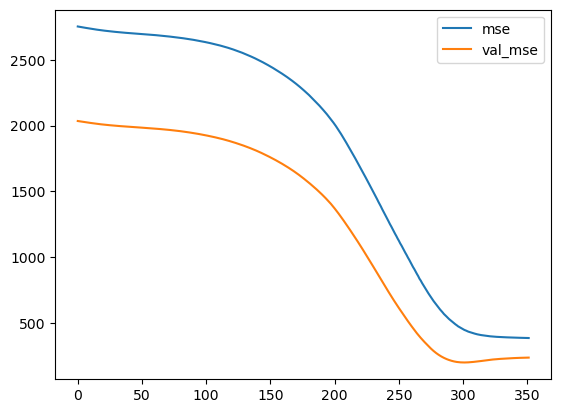

In [18]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse', 'val_mse'])
plt.show()

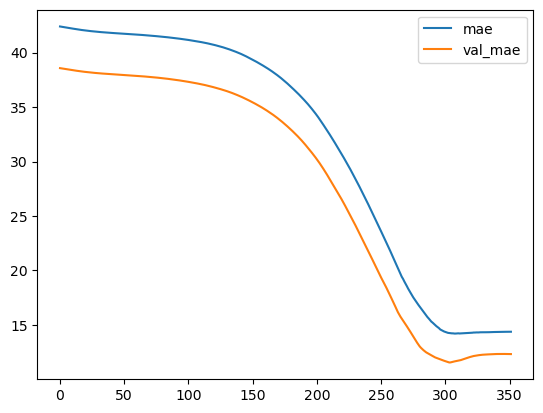

In [19]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.show()

In [20]:
scores = model.evaluate(X_train_scaled, y_train)
print(scores)

scores = model.evaluate(X_test_scaled, y_test)
print(scores)

4/4 [==============================] - 0s 2ms/step - loss: 354.0417 - mse: 354.0417 - mae: 13.9527
[354.04168701171875, 354.04168701171875, 13.952719688415527]
1/1 [==============================] - 0s 22ms/step - loss: 248.2795 - mse: 248.2795 - mae: 11.8345
[248.27947998046875, 248.27947998046875, 11.834470748901367]


In [21]:
from sklearn.metrics import r2_score
pred = model.predict(X_test_scaled)
r2_score(y_test, pred)

1/1 [==============================] - 0s 58ms/step


0.5711145435261624